# Markov Chain
 
Sungchul Lee  

In [1]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

# State



$$i\quad\mbox{state}$$

In [2]:
states = [0,1,2,3]
n_states = len(states)

# Transition probability



$$p_{ij}\quad\mbox{transition probability of jumping from $i$ to $j$}$$

In [3]:
P = np.empty((n_states, n_states))

l = 0.5
r = 0.4
s = 1-l-r

#             0   1   2   3   
P[ 0, :] = [s+l,  r,  0,  0]
P[ 1, :] = [  l,  s,  r,  0]
P[ 2, :] = [  0,  l,  s,  r]
P[ 3, :] = [  0,  0,  l,s+r]

print(P)

[[0.6 0.4 0.  0. ]
 [0.5 0.1 0.4 0. ]
 [0.  0.5 0.1 0.4]
 [0.  0.  0.5 0.5]]


# Initial state

In [4]:
state = np.random.choice(states) 
print(state)

1


# Stationary distribution $\pi$

$$
\pi {\bf P} = \pi
$$
$$$$
$$
\left[\begin{array}{ccccc}\pi[0]&\pi[1]&\pi[2]&\pi[3]\end{array}\right]
\left[\begin{array}{ccccc}
{\bf P}[0,0]&{\bf P}[0,1]&{\bf P}[0,2]&{\bf P}[0,3]\\
{\bf P}[1,0]&{\bf P}[1,1]&{\bf P}[1,2]&{\bf P}[1,3]\\
{\bf P}[2,0]&{\bf P}[2,1]&{\bf P}[2,2]&{\bf P}[2,3]\\
{\bf P}[3,0]&{\bf P}[3,1]&{\bf P}[3,2]&{\bf P}[3,3]
\end{array}\right]
=
\left[\begin{array}{ccccc}\pi[0]&\pi[1]&\pi[2]&\pi[3]\end{array}\right]
$$

$$
\pi[i]\ge 0\quad\mbox{and}\quad\sum_i\pi[i]=1
$$

# $\pi$ by system of linear equations

$$\pi {\bf P} = \pi$$
$$\pi {\bf P} = \pi{\bf I}$$
$$\pi ({\bf P}-{\bf I}) = [0,0,0,0]$$
$$\pi \underbrace{\left[({\bf P}-{\bf I}), {\bf 1}\right]}_{\bf A} = \underbrace{[0,0,0,0,1]}_{\bf b}$$

In [5]:
A = np.c_[P - np.eye(n_states), np.ones((n_states,1))]
b = np.zeros((1, n_states+1)); b[0,-1] = 1
pi, residue, rank, singular_values = np.linalg.lstsq(A.T, b.T)
pi = pi.T
print(pi)

[[0.33875339 0.27100271 0.21680217 0.17344173]]


/Users/sungchullee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


# $\pi$ by simulation

1. Generate a simulated path of many steps.

2. For each time step $n$, using the first $n$ steps of sample path compute empirical PMF $\pi_n$:

$$
\pi_n[i]=\frac{\#\ \mbox{visits of state $i$ up to time $n$}}{n}
$$
$$$$
Under mild conditions, as $n\rightarrow\infty$
$$
\pi_n[i]\rightarrow\pi[i]
$$
where
$$
\pi\quad\mbox{unique stationary distribution}
$$

In [6]:
n_steps = 1000

In [7]:
visit_log = np.zeros((n_states, n_steps))     
for step in range(n_steps):
    visit_log[state, step] = 1.
    next_state = np.random.choice(states, p=P[state, :])
    state = next_state

In [8]:
print(visit_log)

[[0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


In [9]:
print(np.cumsum(visit_log, axis=1))

[[  0.   0.   0. ... 384. 384. 384.]
 [  1.   1.   1. ... 274. 275. 275.]
 [  0.   1.   1. ... 188. 188. 189.]
 [  0.   0.   1. ... 152. 152. 152.]]


In [10]:
pi_ = np.cumsum(visit_log, axis=1) / (np.arange(n_steps) + 1).reshape((1,-1))
print(np.round(pi_, 2)) 

[[0.   0.   0.   ... 0.38 0.38 0.38]
 [1.   0.5  0.33 ... 0.27 0.28 0.28]
 [0.   0.5  0.33 ... 0.19 0.19 0.19]
 [0.   0.   0.33 ... 0.15 0.15 0.15]]


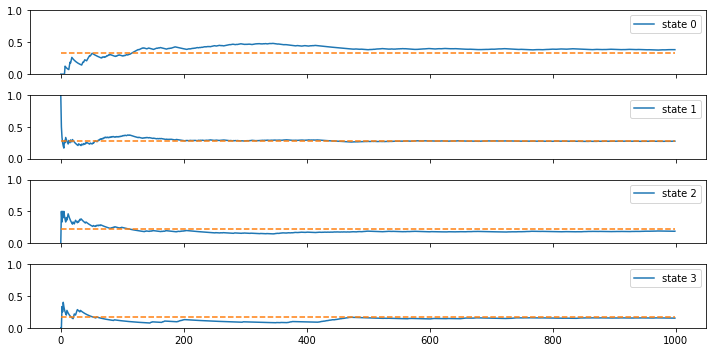

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 5), sharex=True)
for s in range(n_states):
    axes[s].plot(pi_[s], label="state {}".format(str(s)))
    axes[s].plot([0, n_steps-1], [pi[0,s], pi[0,s]], '--')
    axes[s].legend(loc='upper right')
    axes[s].set_ylim([0., 1.])   
plt.tight_layout()
plt.show()